In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


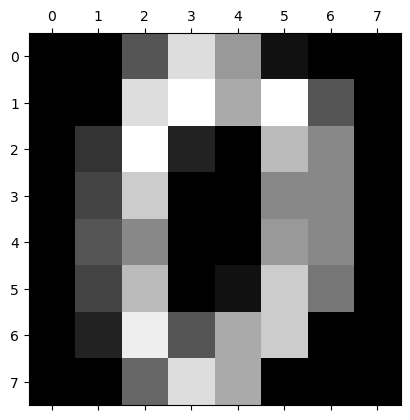

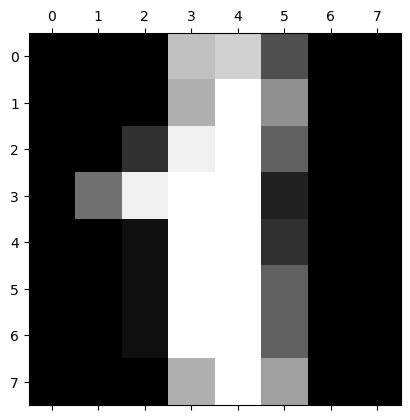

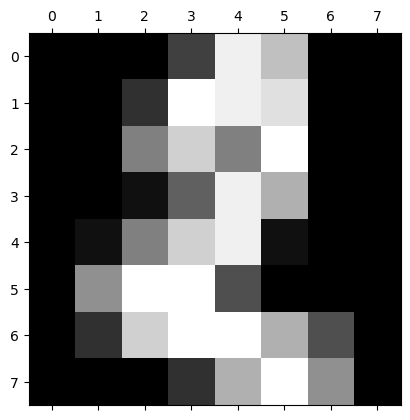

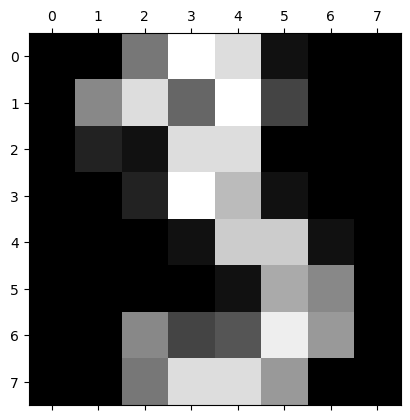

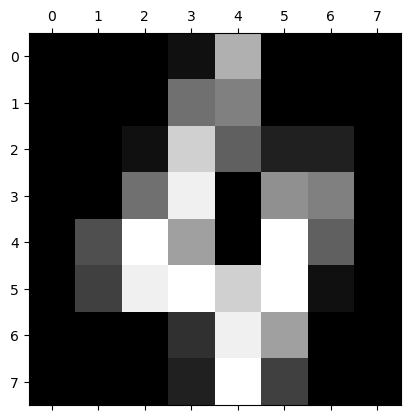

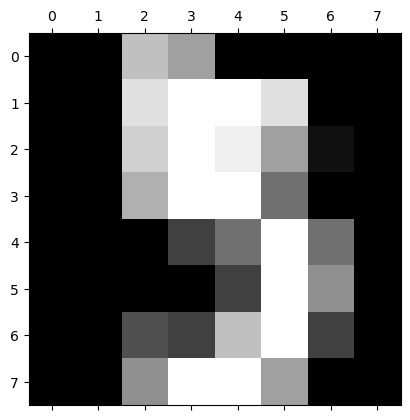

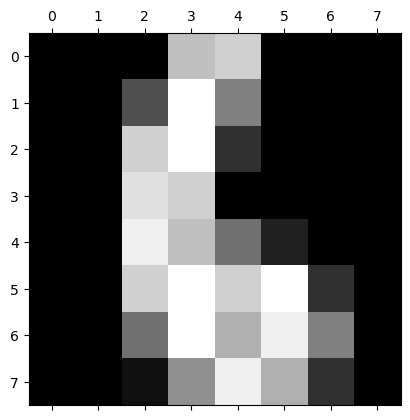

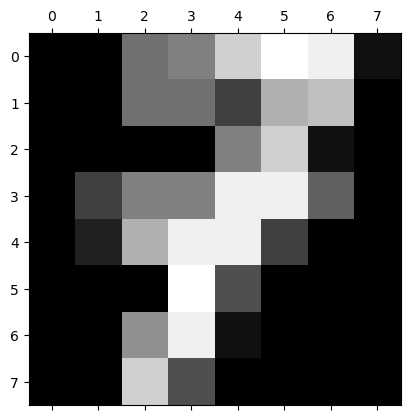

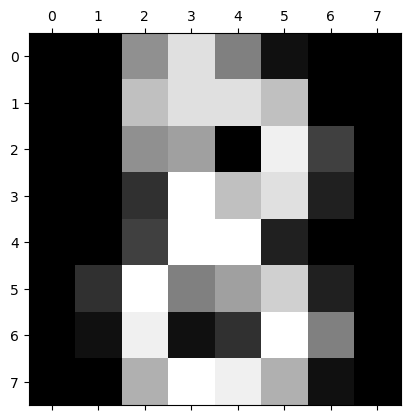

In [4]:
for i in range(9):
    plt.matshow(digits.images[i], cmap='gray')

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
df['numeric'] = digits.target
df['numeric'] = df['numeric'].apply(lambda x: digits.target[x])

In [7]:
df['numeric']

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: numeric, Length: 1797, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(digits.data, digits.target, test_size=0.2)

In [12]:
len(train_X)

1437

In [13]:
len(test_X)

360

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)

KNeighborsClassifier()

In [42]:
knn.score(test_X, test_y)

0.9722222222222222

In [24]:
pred_y = knn.predict(test_X)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y)

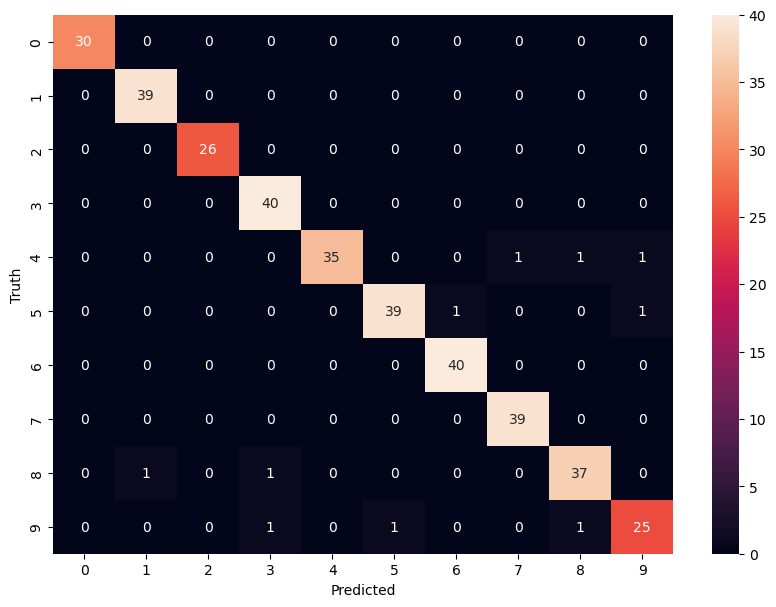

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [34]:
from sklearn.metrics import classification_report

In [39]:
cr = classification_report(test_y, pred_y)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      1.00      0.99        39
           2       1.00      1.00      1.00        26
           3       0.95      1.00      0.98        40
           4       1.00      0.92      0.96        38
           5       0.97      0.95      0.96        41
           6       0.98      1.00      0.99        40
           7       0.97      1.00      0.99        39
           8       0.95      0.95      0.95        39
           9       0.93      0.89      0.91        28

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

